<a href="https://colab.research.google.com/github/Bigote93/Coderhouse_React/blob/master/EscenciaDelCliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-learn

In [ ]:
!pip show pandas numpy scikit-learn seaborn matplotlib

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, bokeh, cmdstanpy, cufflinks, datascience, db-dtypes, dopamine-rl, fastai, geopandas, google-colab, gspread-dataframe, holoviews, mizani, mlxtend, pandas-datareader, pandas-gbq, panel, plotnine, prophet, pymc, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance
---
Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, chex, cmdstanpy, contourp

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df_original = pd.read_csv('/content/drive/MyDrive/Esenciadelcliente/media prediction and its cost.csv')

#Eliminamos la columna de avg_cars_at home(approx).1 que esta doble
df_original = df_original.drop('avg_cars_at home(approx).1', axis = 1)
df_original

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


## Algunos detalles del dataset para analisis

In [52]:
#Nombres de columnas

df_columns_name = df_original.columns
df_columns_name

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

In [53]:
#Tipo de datos por columna
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  float64
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

In [54]:
#Verificar si existen valores NaN en las columnas
df_original.isnull().sum()[:5]

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
dtype: int64

Validacion de nombres de columnas

In [56]:
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
     #Columna eliminada: 'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

df_original = df_original.rename(columns=columnas)
df_original.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'marca', 'precio_recomendado', 'peso_bruto',
       'peso_neto', 'empaque_reciclable', 'bajo_en_grasa', 'unidades_por_caja',
       'comercio', 'ciudad', 'estado', 'pies_cuadrados_tienda',
       'pies_cuadrados_comestibles', 'pies_cuadrados_congelados',
       'pies_cuadrados_carne', 'cafeteria', 'tienda_de_videos',
       'barra_de_ensaladas', 'comida_preparada', 'floristeria', 'divulgacion',
       'costo'],
      dtype='object')

## Analisis de variables


Cambiamos los valores segun diccionario

In [57]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

#Columnas que cambiaremos los valores de columnas
lista_cambios = [
    ['categoria_alimento', categoria_alimento],
    ['departamento', departamento],
    ['tipo', tipo],
    ['promocion', promocion],
    ['escolaridad', escolaridad],
    ['miembro', miembro],
    ['ocupacion', ocupacion],
    ['pais', pais],
    ['estado_civil', estado_civil],
    ['genero', genero],
    ['vivienda_propia', vivienda_propia],
    ['ingreso_anual', ingreso_anual],
    ['comercio', comercio],
    ['divulgacion', divulgacion],
]

#Cargar columnas de la lista y cambiar valores
for name in lista_cambios:
  df_original[name[0]] = df_original[name[0]].replace(name[1])


df_original

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Especialidades,Carrusel,No comestible,2.76,1.3248,1.0,Días de ahorro,Estados Unidos,Casado,Femenino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cupón en la tienda,95.25
60424,Especialidades,Carrusel,No comestible,1.60,0.4960,1.0,Rebajando precios,Estados Unidos,Soltero,Femenino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Periódico dominical,69.42
60425,Especialidades,Carrusel,No comestible,5.52,2.5392,2.0,Descuento de fin de semana,Estados Unidos,Casado,Masculino,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",67.51
60426,Especialidades,Carrusel,No comestible,8.28,2.5668,3.0,Días de venta,Canadá,Soltero,Masculino,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Periódico dominical,132.88


Almacenamos el dataframe como df_limpiado

In [58]:
df_original.to_csv('/content/drive/MyDrive/Esenciadelcliente/dfatrabajar.csv', index=False)
df_original.to_excel('/content/drive/MyDrive/Esenciadelcliente/dfatrabajar.xlsx', index=False)



# Indidualizacion de dataframes

* Dataframe clientes: df_clientes
* Dataframe Tienda: df_tienda
* Dataframe Venta: df_venta

## Dataframe clientes

In [111]:
#Dataframe cliente
df_clientes = df_original[[
    'pais',
    'estado_civil',
    'genero',
    'total_de_hijos',
    'escolaridad',
    'miembro',
    'ocupacion',
    'vivienda_propia',
    'promedio_autos(aprox)',
    'ingreso_anual',
    'numero_hijos',
    'ciudad',
    'costo'
]]

df_clientes.to_csv('/content/drive/MyDrive/Esenciadelcliente/dfcliente.csv', index=False)

df_clientes

,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,ciudad,costo
0,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,Salem,126.62
1,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,Salem,59.86
2,Estados Unidos,Soltero,Femenino,4.0,Primaria,Normal,Obrero,No,1.0,20000,0.0,Salem,84.16
3,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,Salem,95.78
4,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,Salem,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Estados Unidos,Casado,Femenino,1.0,Primaria,Normal,Técnico,Sí,1.0,20000,1.0,San Francisco,95.25
60424,Estados Unidos,Soltero,Femenino,2.0,Secundaria,Bronce,Técnico,No,2.0,40000,0.0,San Francisco,69.42
60425,Estados Unidos,Casado,Masculino,1.0,Secundaria,Bronce,Obrero,Sí,3.0,40000,0.0,San Francisco,67.51
60426,Canadá,Soltero,Masculino,2.0,Superior,Bronce,Profesional,No,4.0,80000,0.0,Victoria,132.88


## Dataframe tienda

In [61]:
#Dataframe tienda
df_tienda = df_original[[
    'pais',
    'ciudad',
    'ventas_tienda(en millones)',
    'costo_tienda(en millones)',
    'ventas_unitarias(en millones)',
    'pies_cuadrados_tienda',
    'pies_cuadrados_comestibles',
    'pies_cuadrados_congelados',
    'pies_cuadrados_carne',
    'cafeteria',
    'tienda_de_videos',
    'barra_de_ensaladas',
    'comida_preparada',
    'floristeria'
]]

df_tienda.to_csv('/content/drive/MyDrive/Esenciadelcliente/dftienda.csv', index=False)

df_tienda.sample(5)

,pais,ciudad,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria
45963,Canadá,Vancouver,2.88,0.8928,4.0,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0
50829,Estados Unidos,Portland,8.79,3.0765,3.0,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0
57775,Estados Unidos,Salem,12.84,4.7508,4.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
21225,Estados Unidos,Salem,1.62,0.7614,3.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0
14378,Estados Unidos,Los Angeles,2.44,0.9516,4.0,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0


## Dataframe venta

In [62]:
#Dataframe Venta
df_venta = df_original[[
    'pais',
    'categoria_alimento',
    'departamento',
    'tipo',
    'promocion',
    'empaque_reciclable',
    'bajo_en_grasa',
    'unidades_por_caja',
    'comercio',
    'estado',
    'divulgacion',
    'marca',
    'precio_recomendado',
    'peso_bruto',
    'peso_neto'
]]

df_venta.to_csv('/content/drive/MyDrive/Esenciadelcliente/dfventa.csv', index=False)

df_venta.columns

Index(['pais', 'categoria_alimento', 'departamento', 'tipo', 'promocion',
       'empaque_reciclable', 'bajo_en_grasa', 'unidades_por_caja', 'comercio',
       'estado', 'divulgacion', 'marca', 'precio_recomendado', 'peso_bruto',
       'peso_neto'],
      dtype='object')

# Exploracion inicial de datos

In [63]:
#Cargamos nuevamente los datos
df_trabajar = pd.read_csv('/content/drive/MyDrive/Esenciadelcliente/dfatrabajar.csv')
df_trabajar.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
3831,Vegetales,Productos frescos,Comida,11.32,3.8488,4.0,Días de ahorro,Estados Unidos,Soltero,Femenino,...,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Correo masivo,131.81
15249,Mermeladas y jaleas,Productos para hornear,Comida,1.59,0.5406,3.0,Ahorradores de billetera,Estados Unidos,Soltero,Masculino,...,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",79.95
13645,Bebidas calientes,Bebidas,Bebida,3.36,1.3440,3.0,Descuentos fantásticos,Estados Unidos,Casado,Masculino,...,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Radio,137.46
15790,Mermeladas y jaleas,Productos para hornear,Comida,3.36,1.5120,2.0,Tres por uno,Estados Unidos,Soltero,Masculino,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Periódico dominical,118.25
39372,Analgésicos,Salud e higiene,No comestible,8.61,3.7023,3.0,Adelante,México,Casado,Masculino,...,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Correo masivo,87.07


## (1) Nivel escolarizacion de **ocupacion** por **pais**

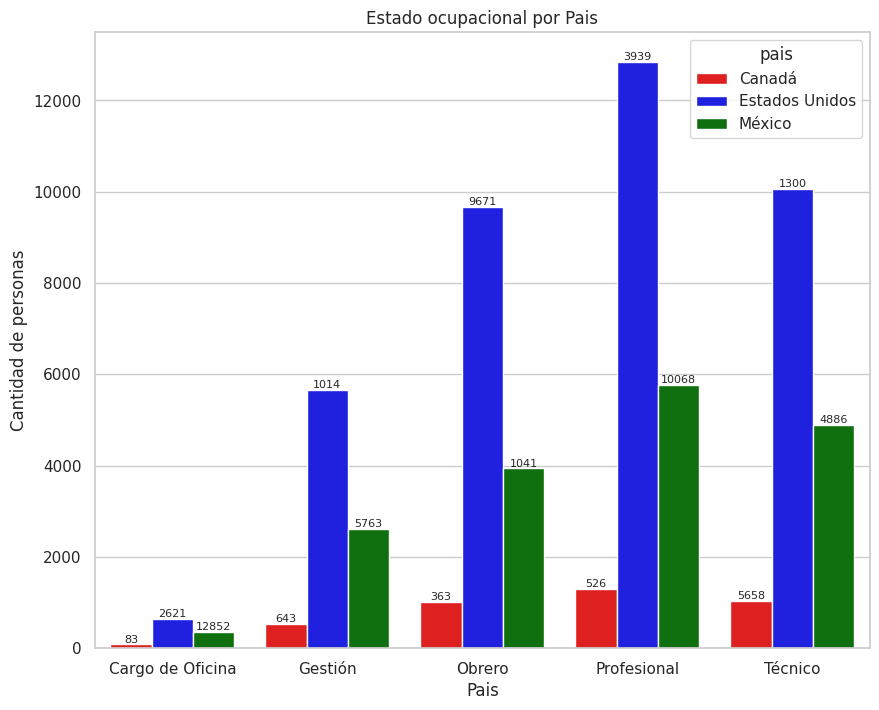

In [182]:
df_ocup_pais = df_trabajar[['ocupacion', 'pais']]

#Creamos agrupacion por ocupacion y pais
df_ocup_pais_g = df_ocup_pais.groupby(['ocupacion','pais']).size().reset_index()
df_ocup_pais_g.columns = ['ocupacion','pais','total']

#Asignacion de tamaño
plt.figure(figsize=(10,8))

# Definir una paleta de colores personalizada para los géneros
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

#GRafico de histograma por data
sns.barplot(
    x="ocupacion",
    y="total",
    hue="pais",
    data=df_ocup_pais_g,
    saturation = 0.75,
    palette = palette)


for i, bar in enumerate(plt.gca().patches):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height(), df_ocup_pais_g['total'].iloc[i], ha="center", va="bottom",fontsize=8)


plt.title('Estado ocupacional por Pais')
plt.xlabel('Pais')
plt.ylabel('Cantidad de personas')

plt.show()

## (2) Ventas de unidades por tipo de producto separado por pais

In [169]:
#Grafico de ventas_productos, por departamento y pais

df_rel2 = df_trabajar[['pais','tipo','ventas_tienda(en millones)','ventas_unitarias(en millones)']]

#Agrupapos por pais y tipo
rel2_group = df_rel2.groupby(['pais','tipo'])

#Conteo por tipo
rel2_tipo_count = rel2_group.size()

#Obtener ventas asociadas a esa agrupacion
rel2_ventas_sum = rel2_group.sum()['ventas_tienda(en millones)']

#Creamos el dataframe
df_paisTipoVenta = pd.DataFrame(
    {
        'cantidad_producto' : rel2_tipo_count,
        'ventas_tienda(en millones)': rel2_ventas_sum
    }
)

df_paisTipoVenta = df_paisTipoVenta.reset_index()
df_paisTipoVenta.sample(5)

,pais,tipo,cantidad_producto,ventas_tienda(en millones)
3,Estados Unidos,Bebida,3589,21945.71
4,Estados Unidos,Comida,27913,182790.62
0,Canadá,Bebida,345,2092.52
1,Canadá,Comida,2810,18725.01
5,Estados Unidos,No comestible,7390,48682.89


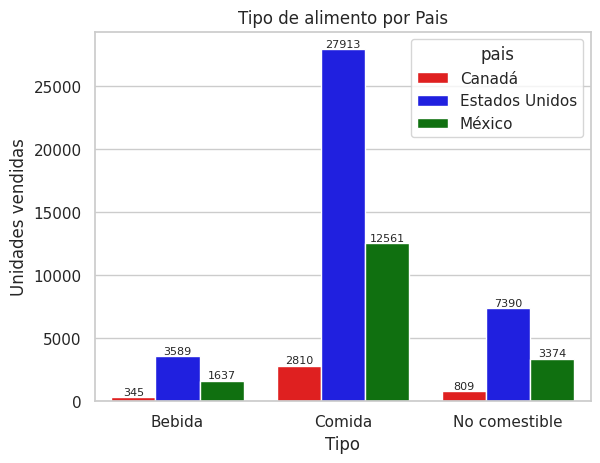

In [181]:
import matplotlib.pyplot as plt

# Crea una figura
fig, ax = plt.subplots()

# Definir una paleta de colores personalizada para los géneros
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Gráfico de tipo de producto por país
sns.barplot(
    x="tipo",
    y="cantidad_producto",
    hue="pais",
    data=df_paisTipoVenta,
    saturation = 0.75,
    palette = palette)


for i, bar in enumerate(plt.gca().patches):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height(), df_paisTipoVenta['cantidad_producto'].iloc[i], ha="center", va="bottom",fontsize=8)


plt.title('Tipo de alimento por Pais')
plt.xlabel('Tipo')
plt.ylabel('Unidades vendidas')

plt.show()


In [168]:
df_rel3 = df_tienda[['pais','ciudad','ventas_tienda(en millones)','costo_tienda(en millones)','ventas_unitarias(en millones)']]

#Sumar cantidad de ventas_tienda(en millones), costo_tienda(en millones) por ciudad
ventas_tienda = df_rel3.groupby(['pais','ciudad']).sum()

#Creamos columna de utilidad considerando las ventas y costos
ventas_tienda['Utilidad(en millones)'] = ventas_tienda['ventas_tienda(en millones)'] - ventas_tienda['costo_tienda(en millones)']

ventas_tienda.sort_values(['pais','Utilidad(en millones)'])

#Creamos columna que indique diferencia de registros con la media de sus valores
ventas_tienda['Media_utilidad'] = ventas_tienda['Utilidad(en millones)'] - ventas_tienda['Utilidad(en millones)'].mean()

ventas_tienda = ventas_tienda.reset_index()

#Eliminamos las columnas de ventas y costos
ventas_tienda = ventas_tienda.drop(['ventas_tienda(en millones)','costo_tienda(en millones)'],axis = 1)

ventas_tienda.sample(5)


,pais,ciudad,ventas_unitarias(en millones),Utilidad(en millones),Media_utilidad
11,Estados Unidos,Tacoma,17877.0,22688.4120,10216.164563
9,Estados Unidos,Seattle,15878.0,20148.5681,7676.320663
16,México,Merida,14151.0,18179.4836,5707.236163
5,Estados Unidos,Los Angeles,12452.0,15850.5253,3378.277863
6,Estados Unidos,Portland,16279.0,20848.9603,8376.712863


## (3) Ventas en millones de $ por ciudad separado por pais

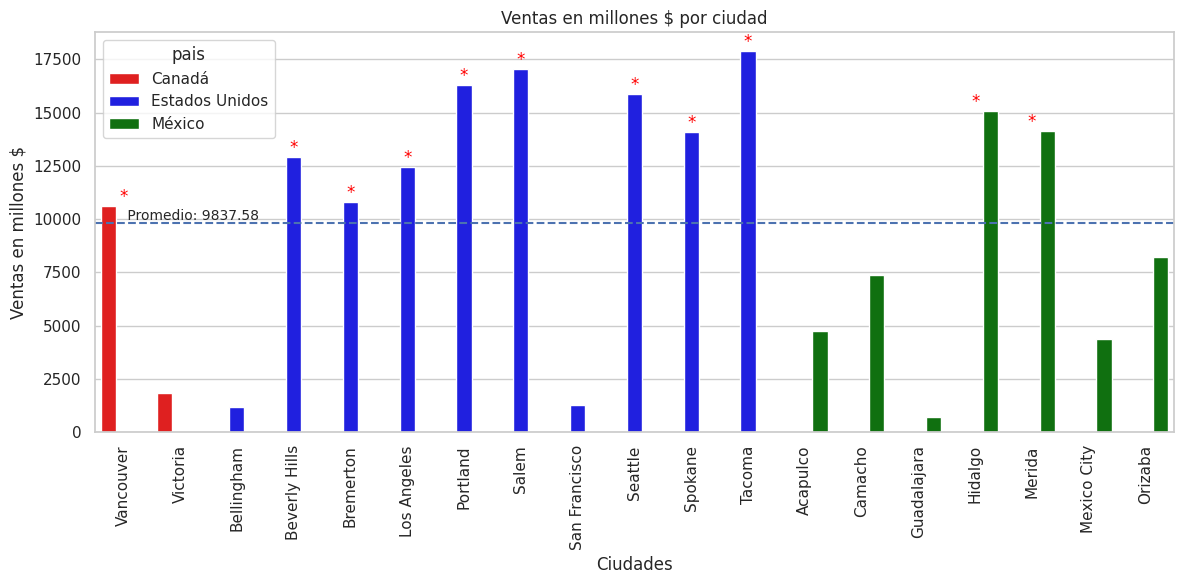

In [170]:
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

# Definir una paleta de colores personalizada para los géneros
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

sns.barplot(x="ciudad", y="ventas_unitarias(en millones)", hue="pais", data=ventas_tienda,palette = palette, errorbar=None)
plt.title("Ventas en millones $ por ciudad")
plt.xlabel("Ciudades")
plt.ylabel("Ventas en millones $")
plt.xticks(rotation=90)
plt.tight_layout()

# Agregar la línea horizontal y su valor promedio al gráfico
mean_value = ventas_tienda['ventas_unitarias(en millones)'].mean()
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales')
plt.text(0, mean_value, f' Promedio: {mean_value:.2f}', va='bottom', ha='left', fontsize = 10)

# Agregar asteriscos (*) sobre las columnas que superen el valor promedio
for index, row in ventas_tienda.iterrows():
    if row['ventas_unitarias(en millones)'] > mean_value:
        plt.text(index, row['ventas_unitarias(en millones)'], '*', ha='center', va='bottom', fontsize=12, color='red')


plt.show()


## (4) Ingreso anual por ciudad separado por genero

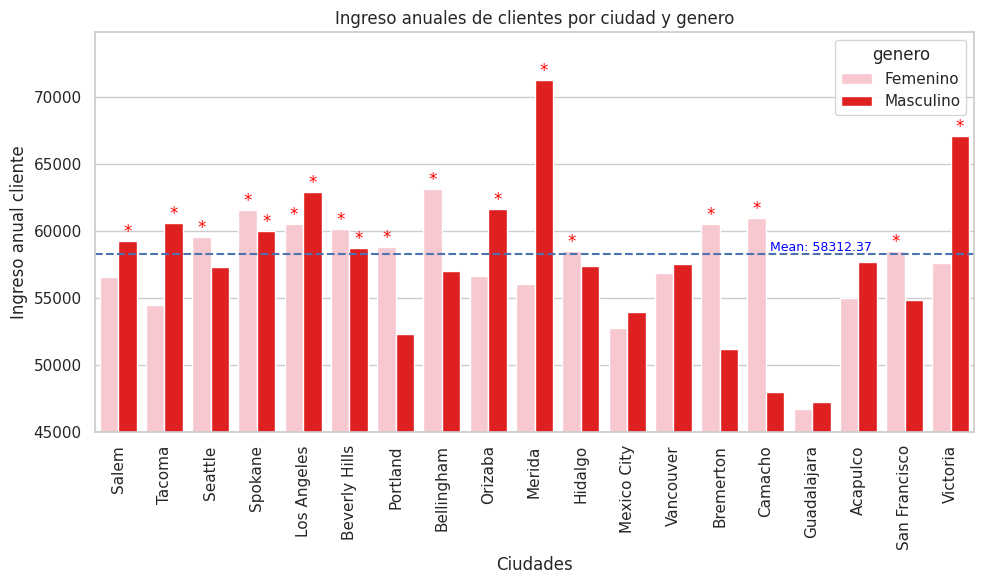

In [183]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Reducir el tamaño de la figura

# Definir una paleta de colores personalizada para los géneros
palette = {'Masculino': 'red', 'Femenino': 'pink'}

sns.barplot(x="ciudad", y="ingreso_anual", hue="genero", data=df_clientes, palette=palette, errorbar=None)
plt.title("Ingreso anuales de clientes por ciudad y genero")
plt.xlabel("Ciudades")
plt.ylabel("Ingreso anual cliente")
plt.xticks(rotation=90)  # Ajustar la rotación de las etiquetas del eje x
plt.tight_layout()

# Agregar la línea horizontal y su valor promedio al gráfico
mean_value = df_clientes['ingreso_anual'].mean()
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales' )
plt.text(14, mean_value, f' Mean: {mean_value:.2f}', va='bottom', ha='left', fontsize=9, color='blue')

# Establecer límite inferior en el eje y
plt.ylim(45000, plt.ylim()[1])  # Eliminar el tercer argumento para el límite superior

# Agregar asteriscos (*) sobre las columnas que superen el valor promedio
for i, bar in enumerate(plt.gca().patches):
  if bar.get_height() > mean_value:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '*', ha='center', va='bottom', color='red')

plt.show()



## (5) Ingreso anual por pais separado por genero




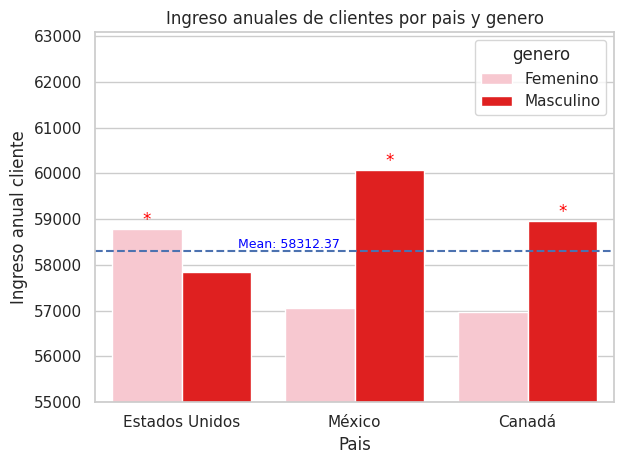

In [184]:
# Crear un gráfico de barras agrupadas

# Definir una paleta de colores personalizada para los géneros
palette = {'Masculino': 'red', 'Femenino': 'pink'}

sns.barplot(x="pais", y="ingreso_anual", hue="genero", data=df_clientes, palette=palette, errorbar=None)
plt.title("Ingreso anuales de clientes por pais y genero")
plt.xlabel("Pais")
plt.ylabel("Ingreso anual cliente")
plt.tight_layout()

# Agregar la línea horizontal y su valor promedio al gráfico
mean_value = df_clientes['ingreso_anual'].mean()
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales' )
plt.text(0.3, mean_value, f' Mean: {mean_value:.2f}', va='bottom', ha='left', fontsize=9, color='blue')

# Establecer límite inferior en el eje y
plt.ylim(55000, plt.ylim()[1])  # Eliminar el tercer argumento para el límite superior

# Agregar asteriscos (*) sobre las columnas que superen el valor promedio
for i, bar in enumerate(plt.gca().patches):
  if bar.get_height() > mean_value:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '*', ha='center', va='bottom', color='red')

plt.show()
